<a href="https://colab.research.google.com/github/VUT-BA-3-2-Project-2025/Team-force/blob/main/Team_Force_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#All neccessary imports here
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [6]:
logistics_df = pd.read_csv("https://raw.githubusercontent.com/VUT-BA-3-2-Project-2025/Team-force/main/logistics_dataset.csv")
logistics_df.head()

,item_id,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,...,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score
0,ITM10000,Pharma,283,21,4,4,49.85,1.56,0.43,L82,...,117.80,1.14,0,0.80,700,3.33,0.33,2024-02-17,184.37,0.556
1,ITM10001,Automotive,301,52,9,6,23.34,2.55,0.69,L15,...,178.80,1.09,3,0.79,736,10.36,0.98,2024-10-01,221.94,0.723
2,ITM10002,Groceries,132,60,11,8,37.69,3.15,0.62,L4,...,54.05,0.95,7,0.75,814,14.32,0.87,2024-04-07,53.85,0.680
3,ITM10003,Automotive,346,46,13,5,33.69,2.79,0.21,L95,...,31.10,1.90,0,0.96,994,2.08,0.29,2024-01-27,92.04,0.488
4,ITM10004,Automotive,49,55,4,6,49.58,5.23,0.31,L36,...,104.97,0.63,5,0.83,299,5.65,0.96,2024-05-17,194.58,0.670


In [10]:
logistics_df.describe()

,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,picking_time_seconds,handling_cost_per_unit,unit_price,holding_cost_per_unit_day,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,forecasted_demand_next_7d,KPI_score
count,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000,3204.000000
mean,263.491573,54.759363,8.507803,5.578340,25.435868,5.260078,0.542325,95.606429,2.777116,105.887575,1.045993,4.602372,0.849738,521.714732,8.123677,0.600581,154.286245,0.601737
std,138.568360,26.053354,3.473229,2.292486,14.038861,2.725639,0.259200,49.218084,1.305213,54.428161,0.550480,2.883708,0.086703,276.768531,4.069191,0.230511,82.945255,0.108286
min,20.000000,10.000000,3.000000,2.000000,1.010000,0.500000,0.100000,10.000000,0.500000,10.220000,0.100000,0.000000,0.700000,50.000000,1.000000,0.200000,10.090000,0.259000
25%,144.000000,32.000000,5.000000,4.000000,13.535000,2.917500,0.310000,53.000000,1.660000,59.760000,0.580000,2.000000,0.780000,283.000000,4.590000,0.400000,83.190000,0.527000
50%,264.000000,55.000000,9.000000,6.000000,25.405000,5.235000,0.540000,96.000000,2.810000,106.005000,1.050000,5.000000,0.850000,513.500000,8.150000,0.600000,152.870000,0.601000
75%,386.000000,78.000000,12.000000,8.000000,37.412500,7.542500,0.760000,138.000000,3.910000,152.410000,1.522500,7.000000,0.920000,764.250000,11.692500,0.800000,225.440000,0.677250
max,499.000000,99.000000,14.000000,9.000000,49.980000,10.000000,1.000000,179.000000,5.000000,200.000000,2.000000,9.000000,1.000000,999.000000,15.000000,1.000000,299.940000,0.936000


In [12]:
logistics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3204 entries, 0 to 3203
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_id                    3204 non-null   object 
 1   category                   3204 non-null   object 
 2   stock_level                3204 non-null   int64  
 3   reorder_point              3204 non-null   int64  
 4   reorder_frequency_days     3204 non-null   int64  
 5   lead_time_days             3204 non-null   int64  
 6   daily_demand               3204 non-null   float64
 7   demand_std_dev             3204 non-null   float64
 8   item_popularity_score      3204 non-null   float64
 9   storage_location_id        3204 non-null   object 
 10  zone                       3204 non-null   object 
 11  picking_time_seconds       3204 non-null   int64  
 12  handling_cost_per_unit     3204 non-null   float64
 13  unit_price                 3204 non-null   float

In [13]:
logistics_df.isnull().sum()

,0
item_id,0
category,0
stock_level,0
reorder_point,0
reorder_frequency_days,0
lead_time_days,0
daily_demand,0
demand_std_dev,0
item_popularity_score,0
storage_location_id,0


In [18]:
for col in ['category', 'storage_location_id', 'zone']:
    print(logistics_df[col].value_counts())

category
Pharma         660
Automotive     658
Electronics    651
Groceries      618
Apparel        617
Name: count, dtype: int64
storage_location_id
L57    41
L31    41
L59    41
L87    40
L83    40
       ..
L26    22
L67    22
L27    20
L22    20
L2     19
Name: count, Length: 100, dtype: int64
zone
D    833
A    812
B    784
C    775
Name: count, dtype: int64


In [21]:
#turn last restock date to date datatype
logistics_df['last_restock_date'] = pd.to_datetime(logistics_df['last_restock_date'])

#Creating new variables to help our model predict better
logistics_df['days_since_last_restock'] = (logistics_df['last_restock_date'].max() - logistics_df['last_restock_date']).dt.days
logistics_df['demand_to_stock_ratio'] = logistics_df['daily_demand'] / logistics_df['stock_level'].replace(0, 1e-6)
logistics_df.head()

,item_id,category,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,...,stockout_count_last_month,order_fulfillment_rate,total_orders_last_month,turnover_ratio,layout_efficiency_score,last_restock_date,forecasted_demand_next_7d,KPI_score,days_since_last_restock,demand_to_stock_ratio
0,ITM10000,Pharma,283,21,4,4,49.85,1.56,0.43,L82,...,0,0.80,700,3.33,0.33,2024-02-17,184.37,0.556,317,0.176148
1,ITM10001,Automotive,301,52,9,6,23.34,2.55,0.69,L15,...,3,0.79,736,10.36,0.98,2024-10-01,221.94,0.723,90,0.077542
2,ITM10002,Groceries,132,60,11,8,37.69,3.15,0.62,L4,...,7,0.75,814,14.32,0.87,2024-04-07,53.85,0.680,267,0.285530
3,ITM10003,Automotive,346,46,13,5,33.69,2.79,0.21,L95,...,0,0.96,994,2.08,0.29,2024-01-27,92.04,0.488,338,0.097370
4,ITM10004,Automotive,49,55,4,6,49.58,5.23,0.31,L36,...,5,0.83,299,5.65,0.96,2024-05-17,194.58,0.670,227,1.011837


In [22]:
#one hot encode categorical data
logistics_df = pd.get_dummies(logistics_df, columns=['category'], prefix='category')

numerical_cols_for_interaction = ['daily_demand', 'stock_level']
category_cols = [col for col in logistics_df.columns if col.startswith('category_')]

for num_col in numerical_cols_for_interaction:
    for cat_col in category_cols:
        logistics_df[f'{num_col}_interaction_{cat_col}'] = logistics_df[num_col] * logistics_df[cat_col]

logistics_df.head()

,item_id,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,zone,...,daily_demand_interaction_category_Apparel,daily_demand_interaction_category_Automotive,daily_demand_interaction_category_Electronics,daily_demand_interaction_category_Groceries,daily_demand_interaction_category_Pharma,stock_level_interaction_category_Apparel,stock_level_interaction_category_Automotive,stock_level_interaction_category_Electronics,stock_level_interaction_category_Groceries,stock_level_interaction_category_Pharma
0,ITM10000,283,21,4,4,49.85,1.56,0.43,L82,B,...,0.0,0.00,0.0,0.00,49.85,0,0,0,0,283
1,ITM10001,301,52,9,6,23.34,2.55,0.69,L15,A,...,0.0,23.34,0.0,0.00,0.00,0,301,0,0,0
2,ITM10002,132,60,11,8,37.69,3.15,0.62,L4,B,...,0.0,0.00,0.0,37.69,0.00,0,0,0,132,0
3,ITM10003,346,46,13,5,33.69,2.79,0.21,L95,A,...,0.0,33.69,0.0,0.00,0.00,0,346,0,0,0
4,ITM10004,49,55,4,6,49.58,5.23,0.31,L36,D,...,0.0,49.58,0.0,0.00,0.00,0,49,0,0,0


In [23]:
#dropping last restock date since we have days since last restock
logistics_df = logistics_df.drop('last_restock_date', axis=1)
logistics_df.head()

,item_id,stock_level,reorder_point,reorder_frequency_days,lead_time_days,daily_demand,demand_std_dev,item_popularity_score,storage_location_id,zone,...,daily_demand_interaction_category_Apparel,daily_demand_interaction_category_Automotive,daily_demand_interaction_category_Electronics,daily_demand_interaction_category_Groceries,daily_demand_interaction_category_Pharma,stock_level_interaction_category_Apparel,stock_level_interaction_category_Automotive,stock_level_interaction_category_Electronics,stock_level_interaction_category_Groceries,stock_level_interaction_category_Pharma
0,ITM10000,283,21,4,4,49.85,1.56,0.43,L82,B,...,0.0,0.00,0.0,0.00,49.85,0,0,0,0,283
1,ITM10001,301,52,9,6,23.34,2.55,0.69,L15,A,...,0.0,23.34,0.0,0.00,0.00,0,301,0,0,0
2,ITM10002,132,60,11,8,37.69,3.15,0.62,L4,B,...,0.0,0.00,0.0,37.69,0.00,0,0,0,132,0
3,ITM10003,346,46,13,5,33.69,2.79,0.21,L95,A,...,0.0,33.69,0.0,0.00,0.00,0,346,0,0,0
4,ITM10004,49,55,4,6,49.58,5.23,0.31,L36,D,...,0.0,49.58,0.0,0.00,0.00,0,49,0,0,0


In [43]:
target = 'daily_demand'
# removing features that are not needed
features = [col for col in logistics_df.columns if col not in ['item_id', target, 'category', 'storage_location_id', 'zone']]

#input and output values
X = logistics_df[features]
y = logistics_df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2 of original data

model = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42)

In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 0.83
Root Mean Squared Error (RMSE): 1.17


In [48]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate MAE on training set
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calculate RMSE on training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Print the evaluation metrics for the training set
print(f"Mean Absolute Error (MAE) on training dataset: {train_mae:.2f}")
print(f"Root Mean Squared Error (RMSE) on training dataset: {train_rmse:.2f}")

Mean Absolute Error (MAE) on training dataset: 0.45
Root Mean Squared Error (RMSE) on training dataset: 0.69


In [49]:
# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Calculate MAE on validation set
val_mae = mean_absolute_error(y_val, y_val_pred)

# Calculate RMSE on validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

# Print the evaluation metrics for the validation set
print(f"Mean Absolute Error (MAE) on validation dataset: {val_mae:.2f}")
print(f"Root Mean Squared Error (RMSE) on validation dataset: {val_rmse:.2f}")

Mean Absolute Error (MAE) on validation dataset: 0.86
Root Mean Squared Error (RMSE) on validation dataset: 1.25


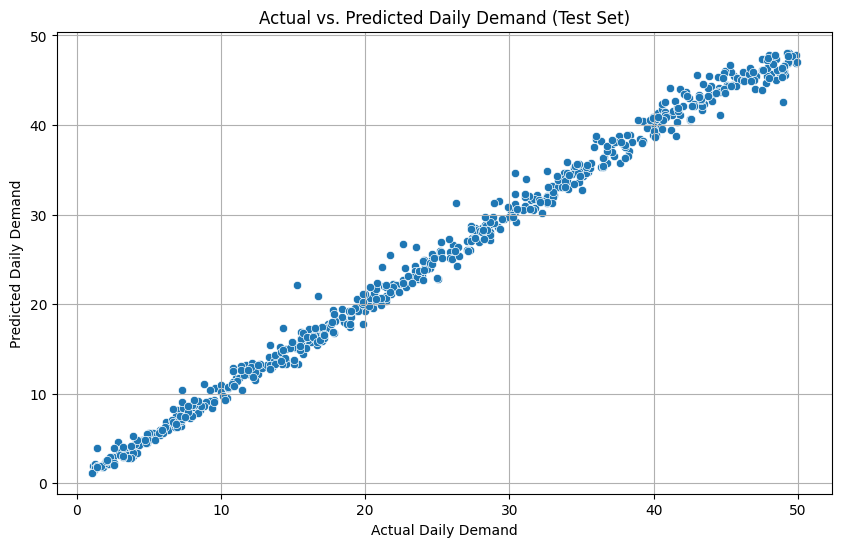

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Daily Demand")
plt.ylabel("Predicted Daily Demand")
plt.title("Actual vs. Predicted Daily Demand (Test Set)")
plt.grid(True)
plt.show()